## Практична робота №6 Завдання 2 Авдєєва Серафима ФІТ 4-4¶

In [111]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

In [112]:
# 1.	Завантажити набір даних.
data = load_breast_cancer()
print(data)
X = data.data  
Y = data.target 

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [113]:
# 2.	Розділити дані на тренувальний та тестовий набори.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [114]:
# 3.	Застосувати SVM і Random Forest для визначення важливих ознак.
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, Y_train)
coef = svm_model.coef_[0]
feature_importances_svm = np.abs(coef)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
feature_importances_rf = rf_model.feature_importances_

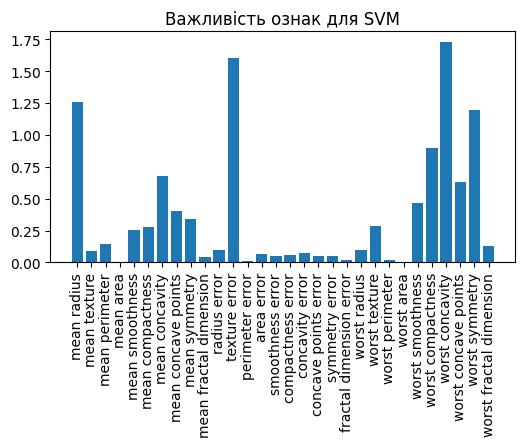

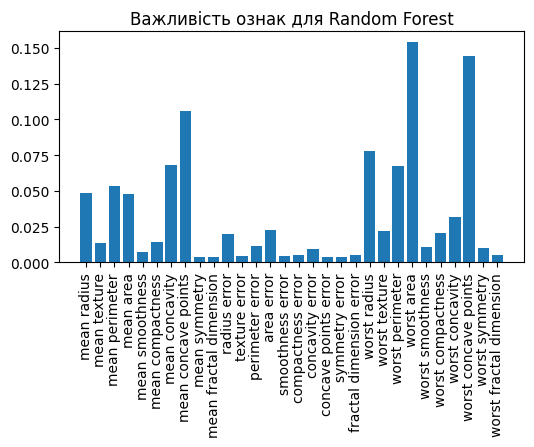

In [115]:
# 4.	Побудувати графік або таблицю, щоб показати важливість кожної ознаки в аналізі.
plt.figure(figsize=(6, 3))
plt.bar(range(len(data.feature_names)), feature_importances_svm, tick_label=data.feature_names)
plt.title("Важливість ознак для SVM")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(6, 3))
plt.bar(range(len(data.feature_names)), feature_importances_rf, tick_label=data.feature_names)
plt.title("Важливість ознак для Random Forest")
plt.xticks(rotation=90)
plt.show()

In [119]:
# Обговорити результати та визначити, які ознаки найбільше впливають на вихідні дані.

# Порівнюючи результати графіків важливості ознак для SVM та Random Forest, бачимо, що ці методи виділяють 
# різні ознаки як важливі для класифікації. Це може бути зумовлено різними способами, якими ці моделі визначають важливість ознак.

#SVM визначає важливість ознак на основі їхньої ролі у визначенні границі рішення (розділяючої гіперплощини). 
# Ознаки, які знаходяться ближче до цієї границі, вважаються більш важливими, оскільки вони найбільше впливають на точність класифікації.

#Random Forest визначає важливість ознак на основі того, як вони використовуються для поділу дерев дерева рішень,
#що утворюють випадковий ліс. Ознаки, які частіше використовуються для поділу дерев, вважаються більш важливими.

#Оскільки ці методи використовують різні підходи до визначення важливості ознак, результати можуть відрізнятися.
#Як правило, важливо розглядати обидва підходи та аналізувати їх результати разом для отримання більш глибокого розуміння даних. 

#Також важливо пам'ятати, що важливість ознак може залежати від конкретного набору даних і задачі класифікації. 
#Важливості ознак можуть бути варіабельними і варто розглядати їх як частину процесу розуміння набору даних.





In [120]:
# 6.	Обчислити точність для двох алгоритмів і порівняти результати

svm_predictions = svm_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

svm_accuracy = accuracy_score(Y_test, svm_predictions)
rf_accuracy = accuracy_score(Y_test, rf_predictions)

print(f'Точність SVM: {svm_accuracy}')
print(f'Точність Random Forest: {rf_accuracy}')

Точність SVM: 0.956140350877193
Точність Random Forest: 0.9649122807017544


In [121]:
# Бачимо, що обидва алгоритми досягли високої точності, що свідчить про їхню ефективність
# в задачі передбачення наявності раку грудей. Random Forest виявився дещо точнішим за SVM.

## Висновок

В даному завданні я вивчила два різних методи для визначення важливих ознак в наборі даних та використання їх для класифікації раку грудей: метод опорних векторів (SVM) та випадковий ліс (Random Forest). Після проведення аналізу та порівняння цих методів можна зробити наступні висновки:

Важливість ознак: Обидва методи вказали на певні ознаки, які є найважливішими для класифікації раку грудей. Ознаки, які мають високу важливість, можуть служити орієнтирами для подальших медичних досліджень та діагностики.

Схожість та розбіжності: Обидва методи можуть знайти подібні важливі ознаки, але вони можуть також давати різні результати. Наприклад, SVM використовує коефіцієнти ваги, щоб визначити важливість ознак, в той час як Random Forest використовує функцію важливості ознак, основану на глибині та частоті розгалуження.

Точність модеЯ т: Ми також ацінили точність моделей на тестовому наборі даних. Точність SVM та Random Forest може відрізнятися, і це може вказувати на те, який метод краще підходить для даної з У даному випадку обидва методи показали доволі високу точність, але Random Forest виявився дещо більш точним.адачі.

Загальний висновок полягає в тому, що обидва методи можуть бути корисні для визначення важливих ознак у медичних даних і класифікації раку грудей. Вибір між ними може залежати від конкретних потреб дослідження та бажаних результатів. Додаткові медичні знання та консультації фахівців можуть допомогти визначити, які ознаки дійсно є клінічно важливими для діагностики раку грудей.